In [2]:
import numpy as np
import cv2
from skimage import data

In [3]:
cat_rgb = data.chelsea()
cat_gray = cv2.cvtColor(cat_rgb, cv2.COLOR_BGR2GRAY)

print(f"nidm:{cat_rgb.ndim}, shape: {cat_rgb.shape}, dtype:{cat_rgb.dtype}, itemsize:{cat_rgb.itemsize}")
print(f"nidm:{cat_gray.ndim}, shape: {cat_gray.shape}, dtype:{cat_gray.dtype}, itemsize:{cat_gray.itemsize}")

nidm:3, shape: (300, 451, 3), dtype:uint8, itemsize:1
nidm:2, shape: (300, 451), dtype:uint8, itemsize:1


In [4]:
cat_hstack=np.hstack((cat_rgb, cat_rgb))
print(cat_hstack.shape)

(300, 902, 3)


In [5]:
cv2.imshow(cat_gray)

TypeError: imshow() missing required argument 'mat' (pos 2)

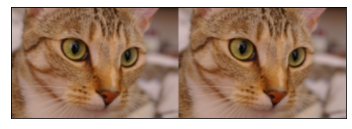

In [6]:
import matplotlib.pyplot as plt

plt.imshow(cat_hstack, interpolation='bicubic')
plt.xticks([]); plt.yticks([])
plt.show()

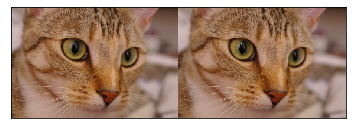

In [7]:
import matplotlib.pyplot as plt

plt.imshow(cat_hstack, interpolation='nearest')
plt.xticks([]); plt.yticks([])
plt.show()

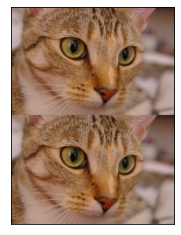

In [8]:
r = np.concatenate((cat_rgb, cat_rgb), axis=0)
plt.imshow(r)
plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
r = np.concatenate((cat_rgb, cat_rgb), axis=2)
print(r.shape)

# plt.imshow(r)
# plt.xticks([]), plt.yticks([])
# plt.show()


(300, 451, 6)


In [10]:
r = np.stack((cat_rgb, cat_rgb), axis=0)
print(r.shape)

(2, 300, 451, 3)


In [11]:
r = np.stack((cat_rgb, cat_rgb), axis=-1)
print(r.shape)

(300, 451, 3, 2)


In [12]:
r = np.stack((cat_rgb,cat_rgb), axis=1)
print(r.shape)

(300, 2, 451, 3)


In [13]:
print(cat_rgb[:,:,2].shape)
r = np.stack((cat_rgb[:,:,2], cat_rgb[:, :,1], cat_rgb[:,:,0]), axis=2)
print(r.shape)

cv2.imshow('a',r)
cv2.waitKey(0)
cv2.destroyAllWindows()

(300, 451)
(300, 451, 3)


In [14]:
img_hsplit = np.hsplit(cat_rgb[:,:450,:], 3)
print(np.shape(img_hsplit))

(3, 300, 150, 3)


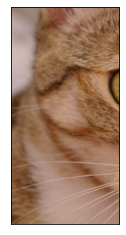

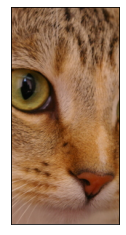

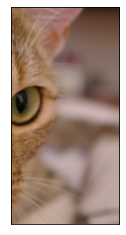

In [21]:
for idx in range(len(img_hsplit)):
    plt.figure()
    plt.imshow(img_hsplit[idx])
    plt.xticks([]), plt.yticks([])
    plt.show()

In [22]:
img_hsplit = np.hsplit(cat_rgb, (200, 300, 350))
print(len(img_hsplit))

for idx, c in enumerate(img_hsplit):
    print(f"{idx:02d}, {c.shape}")

4
00, (300, 200, 3)
01, (300, 100, 3)
02, (300, 50, 3)
03, (300, 101, 3)


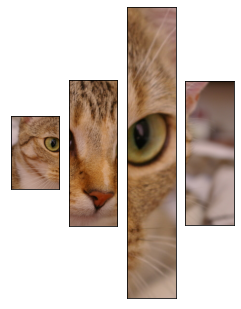

In [24]:
plt.figure(figsize=(4,7))
plt.subplot(1,4,1)
plt.imshow(img_hsplit[0])
plt.xticks([]), plt.yticks([])

plt.subplot(1,4,2)
plt.imshow(img_hsplit[1])
plt.xticks([]), plt.yticks([])

plt.subplot(1,4,3)
plt.imshow(img_hsplit[2])
plt.xticks([]), plt.yticks([])

plt.subplot(1,4,4)
plt.imshow(img_hsplit[3])
plt.xticks([]), plt.yticks([])

plt.show()

In [25]:
img_vsplit = np.vsplit(cat_rgb, 2)
print(np.shape(img_vsplit))

(2, 150, 451, 3)


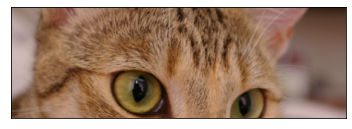

In [26]:
plt.imshow(img_vsplit[0])
plt.xticks([]), plt.yticks([])
plt.show()

In [27]:
img_mono = np.split(cat_rgb, 3, axis=-1)
print(np.shape(img_mono))

(3, 300, 451, 1)


(300, 451, 1)
(300, 451)


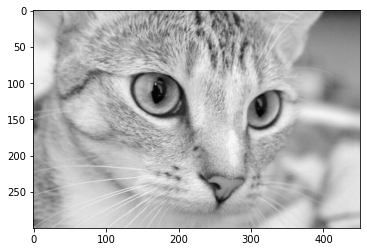

In [29]:
print(img_mono[0].shape)
r = np.squeeze(img_mono[0])
print(r.shape)
plt.imshow(np.squeeze(img_mono[0]),cmap='gray')
plt.show()

(300, 451) <class 'numpy.ndarray'>


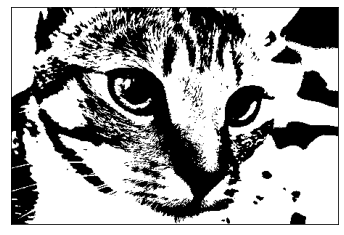

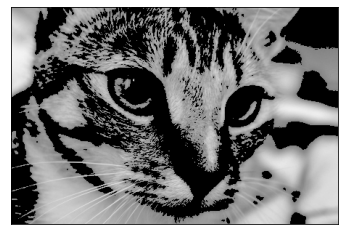

In [31]:
mask = np.where(cat_gray>100, 1, 0)
print(mask.shape,type(mask))
plt.figure()
plt.imshow(mask,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

r = cat_gray * mask
plt.figure()
plt.imshow(r, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

(300, 451)


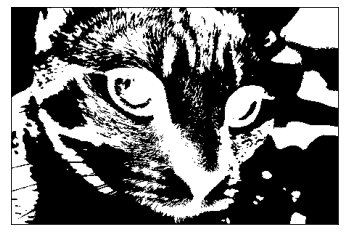

In [34]:
mask2 = np.where(cat_gray>100, 0, 1)
print(np.shape(mask2))
mask2
plt.imshow(mask2, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

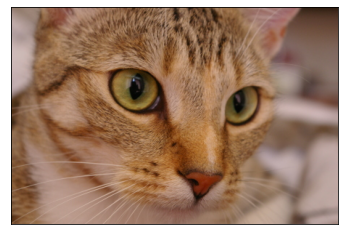

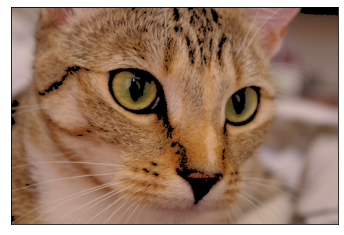

In [37]:
plt.figure()
plt.imshow(cat_rgb)
plt.xticks([]), plt.yticks([])
plt.show()

r = cat_rgb.copy()
r[cat_gray<50] = (0, 0, 0)
plt.figure()
plt.imshow(r)
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
indice = np.where(cat_gray<10)
print(np.shape(indice))

r = np.stack((indice[0]))

In [38]:
g_m = np.mean(cat_gray)
print(g_m)

108.20492978566149


In [39]:
rgb_m = np.mean(cat_rgb)
print(rgb_m)

115.30514166050752


In [40]:
rgb_m = np.mean(cat_rgb, axis=-1)
print(rgb_m.shape)

(300, 451)


In [41]:
rgb_m = np.mean(cat_rgb, axis=0)
print(rgb_m.shape)

(451, 3)


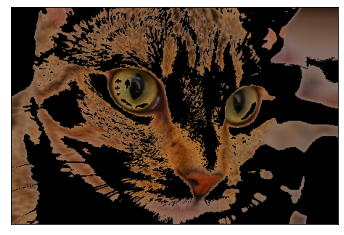

In [42]:
gray_m = np.mean(cat_gray)
r = cat_rgb.copy()
r[cat_gray>gray_m] = (0, 0, 0)
plt.figure()
plt.imshow(r)
plt.xticks([]), plt.yticks([])
plt.show()